<a href="https://colab.research.google.com/github/natrask/ENM1050/blob/main/Pytorch_Model_Fitting_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First set up your pytorch enironment and other includes
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
import os

In [ ]:
# Import data in the form of pkl files from the google drive
from google.colab import drive
drive.mount('/content/drive')

#enter the path to where you stored your data
datadirectory = '/content/drive/My Drive/ENM1050/data_fromrockpaperscissors/'

#loop over all files in the directory ending with .pkl and add them to datalist
dataList = []
for filename in os.listdir(datadirectory):
    if filename.endswith('.pkl'):
        with open(os.path.join(datadirectory, filename), 'rb') as file:
            data = pickle.load(file)
            # Process the loaded data here
            print(f"Loaded data from {filename}")

            # Do some processing to make them all the same size
            data = np.array(data)[:5000,:]
            dataList.append(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded data from populations_experiment-02.pkl
Loaded data from populations_experiment-09.pkl
Loaded data from populations_experiment-01.pkl
Loaded data from populations_experiment-03.pkl
Loaded data from populations_experiment-04.pkl
Loaded data from populations_experiment-07.pkl
Loaded data from populations_experiment-06.pkl
Loaded data from populations_experiment-10.pkl
Loaded data from populations_experiment-08.pkl
Loaded data from populations_experiment-05.pkl


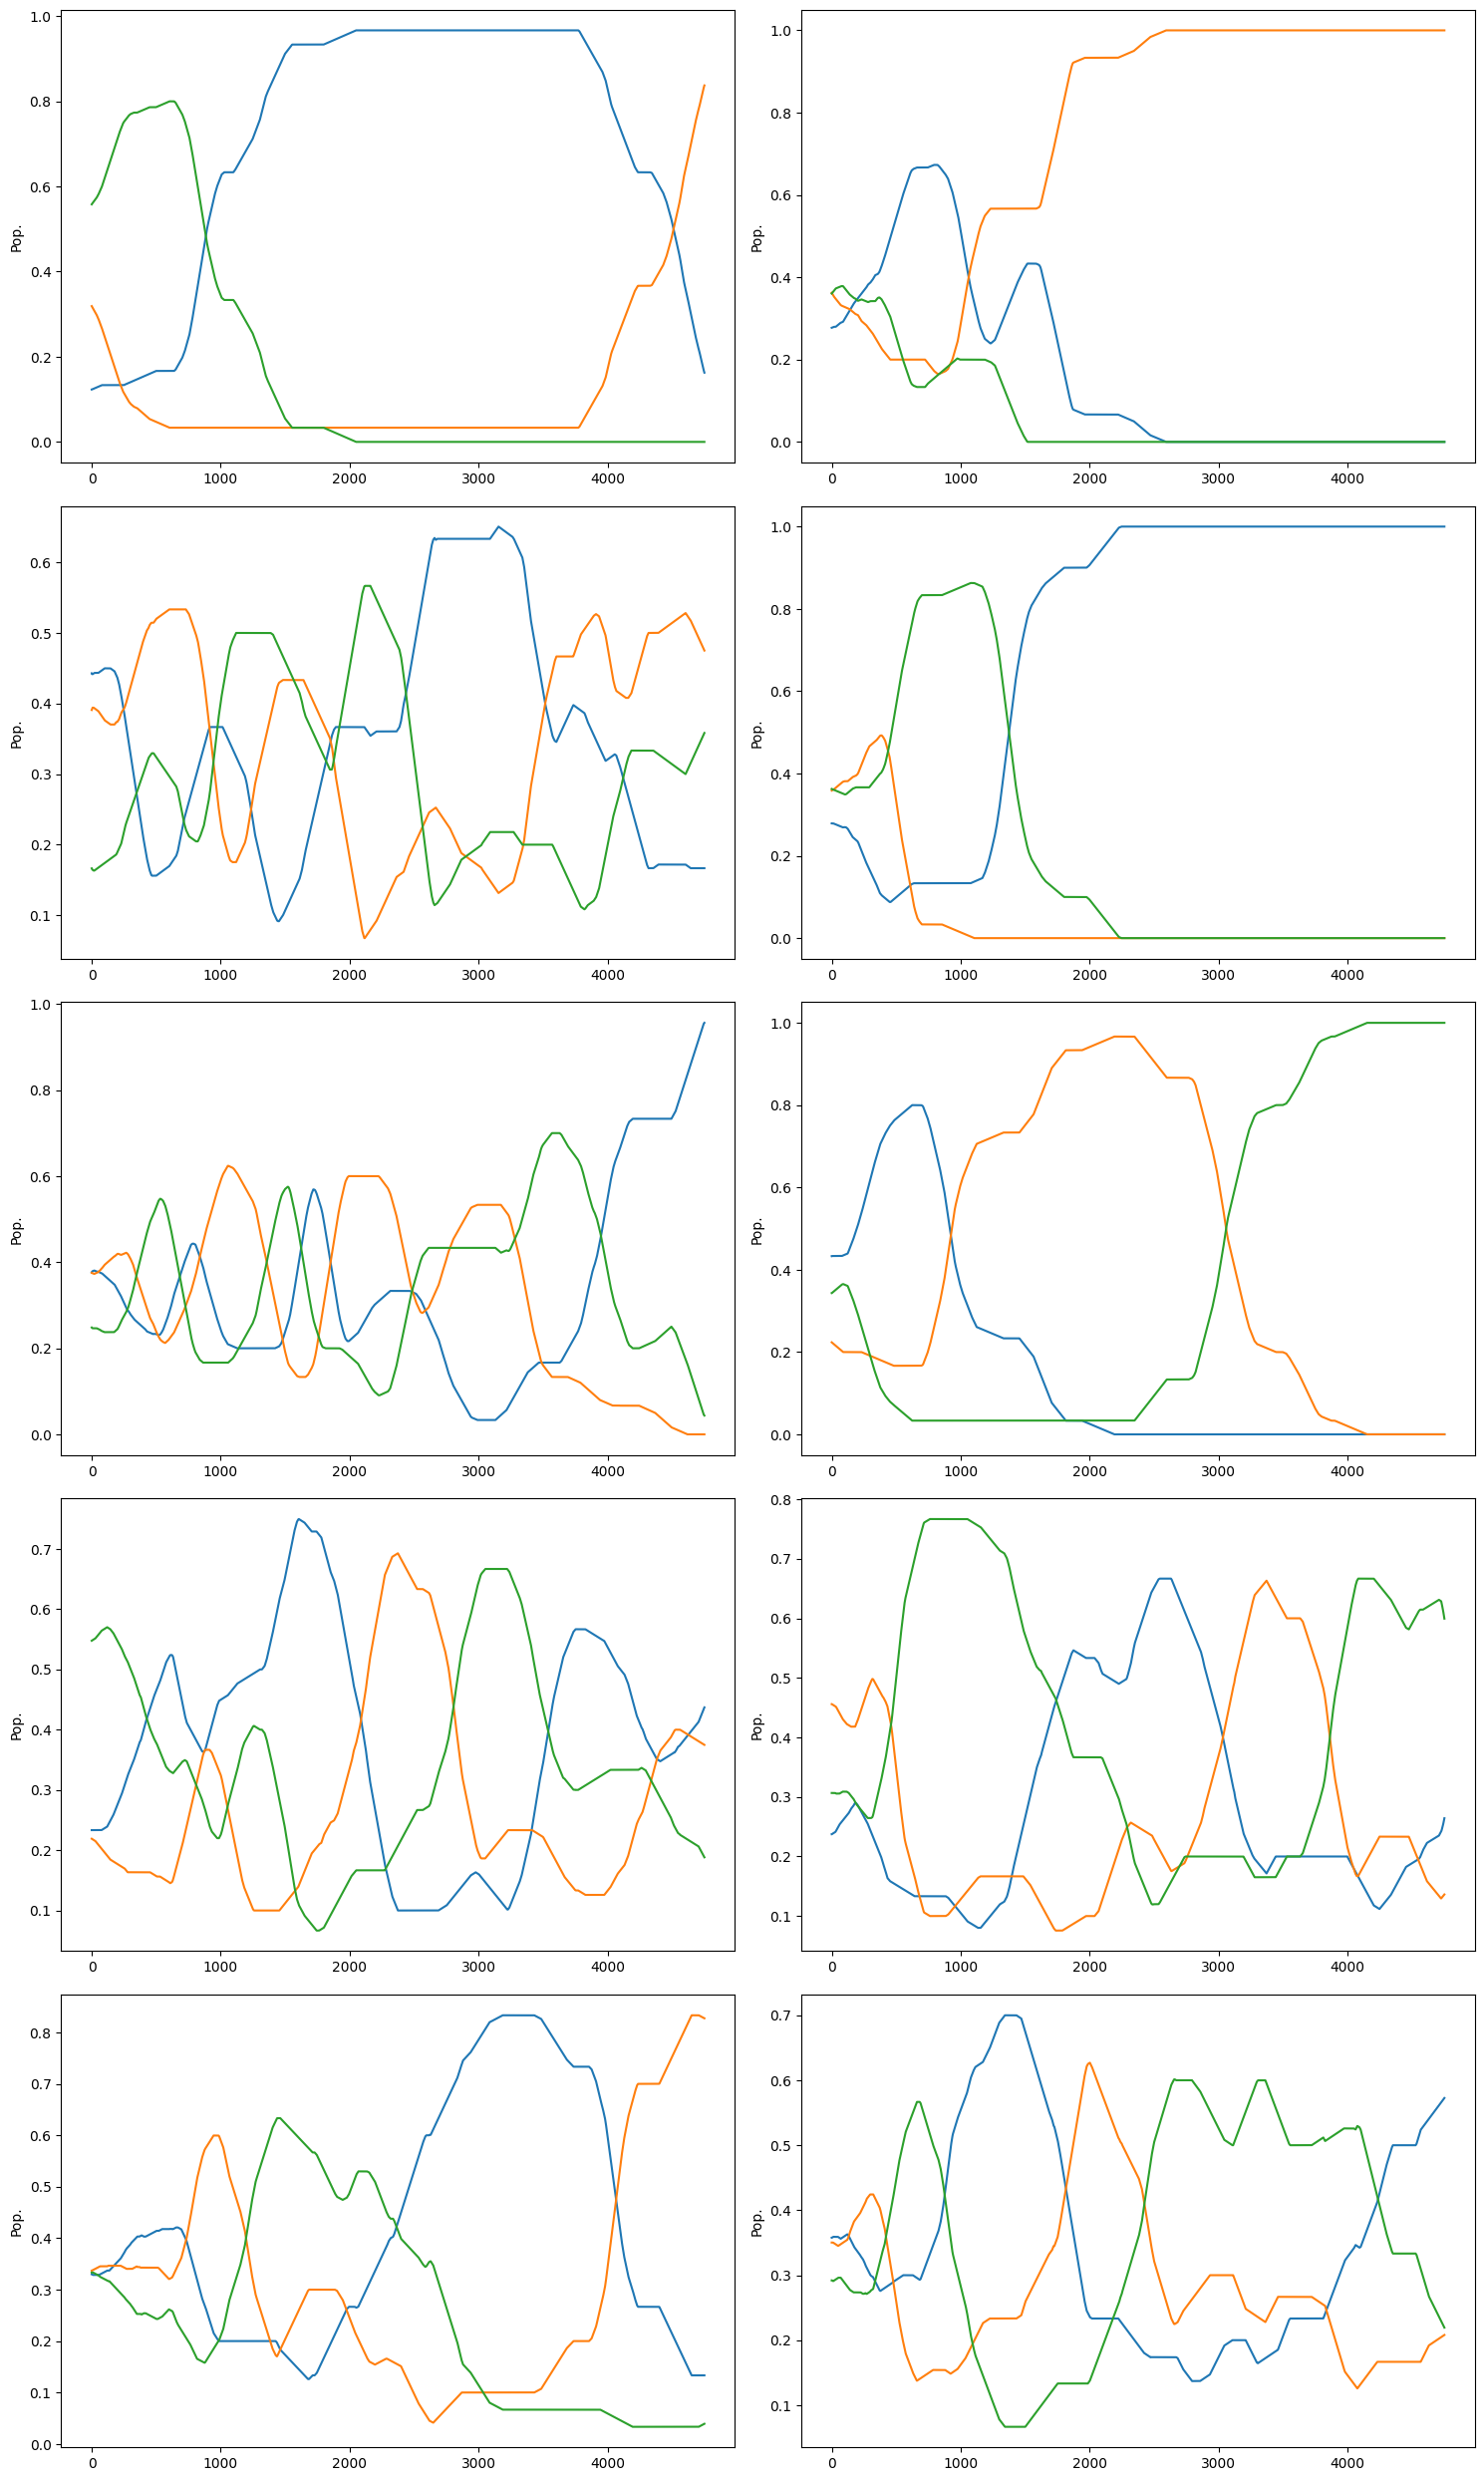

In [ ]:
# Define a moving average filter function
def moving_average(data, window_size=250):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Create a 5x2 grid of plots
fig, axs = plt.subplots(5, 2, figsize=(15, 25))

# Plot data on each subplot
for idx, sim in enumerate(dataList[:10]):
    row = idx // 2
    col = idx % 2
    smoothed_sim = np.apply_along_axis(moving_average, 0, sim)  # Apply smoothing filter
    axs[row, col].plot(smoothed_sim)
    axs[row, col].set_ylabel('Pop.')

# Adjust layout
plt.tight_layout()

# Display the figure
plt.show()

In [ ]:
# The following code will be our jumping off point for building models in PyTorch

class MyPytorchModel(nn.Module):
    def __init__(self):
        super(MyPytorchModel, self).__init__()
        # Define whatever model parameters you want to add.
        # Don't forget to set 'requires_grad=True' for trainable parameters
        self.someParameter = 6
        self.someTrainableParameter = nn.parameter.Parameter(torch.zeros(2, requires_grad=True))


    def forward(self, x):
        # Put code here that will evaluate the model
        # right now, its implementing y = A+B*x
        return self.someTrainableParameter[0] + self.someTrainableParameter[1]*x
        return torch.matmul(basis, self.coeffs)
        # return self.coeffs[0] + self.coeffs[1] * x + self.coeffs[2] * x**2 + self.coeffs[3] * x**3

# Example usage:

# To train the model, we need (x,y) pairs of samples
# Generate noisy samples of a sine function on the unit interval [0, 1]
x_samples = torch.linspace(0, 1, steps=100)
y_samples = torch.sin(2 * np.pi * x_samples) + np.random.normal(0, 0.1, x_samples.size())


# Create the model
model = MyPytorchModel()

# Define the optimizer
#      - there are some options here. SGD is stochastic gradient descent. Adam is another good one
#      - lr is the learning rate - you'll need to play with this to get a good result
optimizer = optim.SGD(model.parameters(), lr=0.01)

# How many steps of training
num_epochs = 100000
for epoch in range(num_epochs):
    # First, we recompute the loss, and take derivatives
    optimizer.zero_grad()
    outputs = model(x_samples)
    loss = torch.sum((outputs - y_samples) ** 2)
    loss.backward()

    # Use the optimizer to tune the weights in the model
    optimizer.step()

    # Print out the loss so you can track whether things are getting better
    if epoch % 1000 == 0:
        print('Epoch {}, Loss {}'.format(epoch, loss.item()))